In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
file_path = input('Enter the file path: ')
# Read the tab-separated data from the file
df = pd.read_csv(file_path, sep='\t')
# df.to_csv('out.csv', index=False)

<Figure size 1200x600 with 0 Axes>

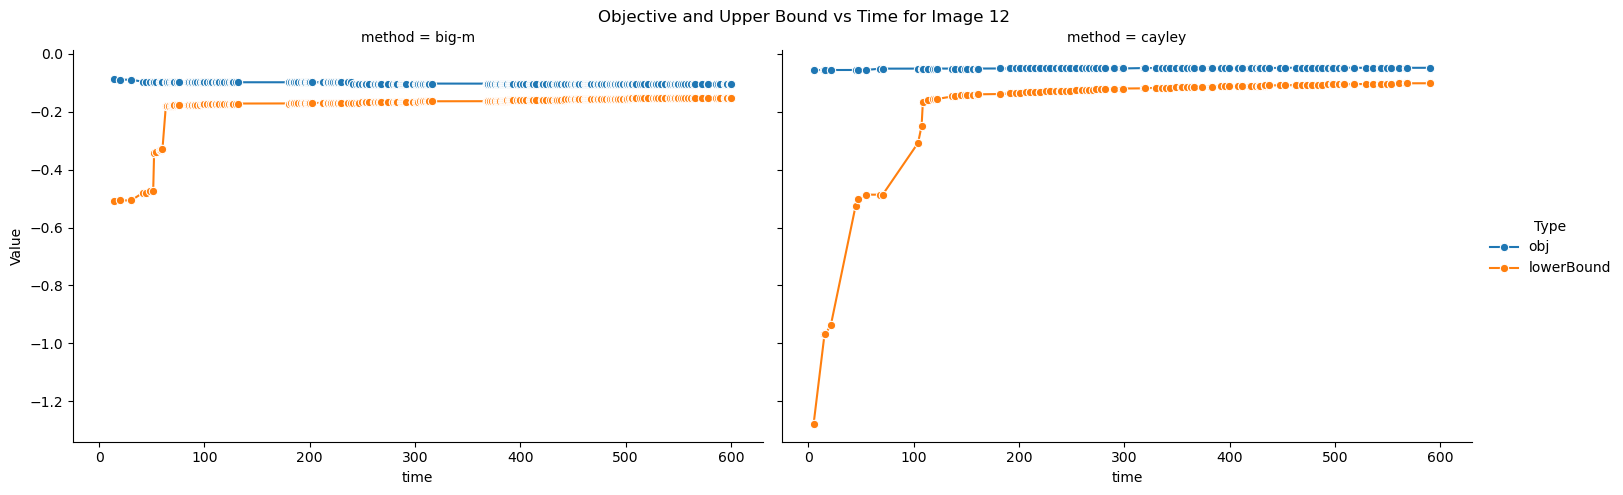

<Figure size 1200x600 with 0 Axes>

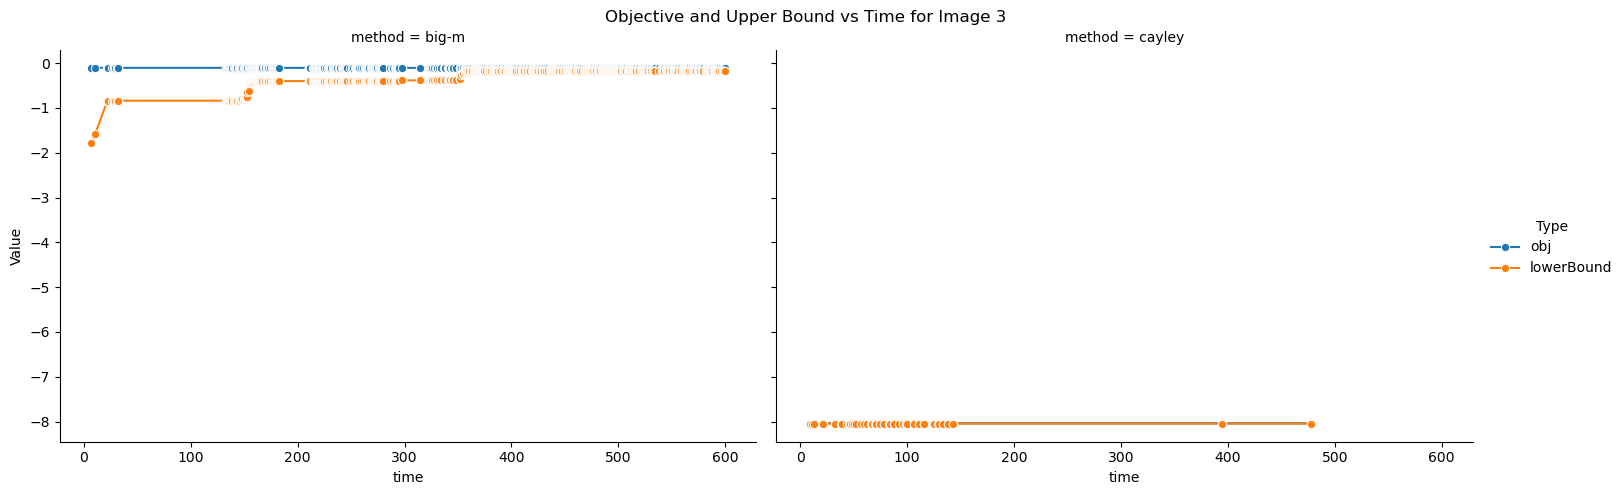

<Figure size 1200x600 with 0 Axes>

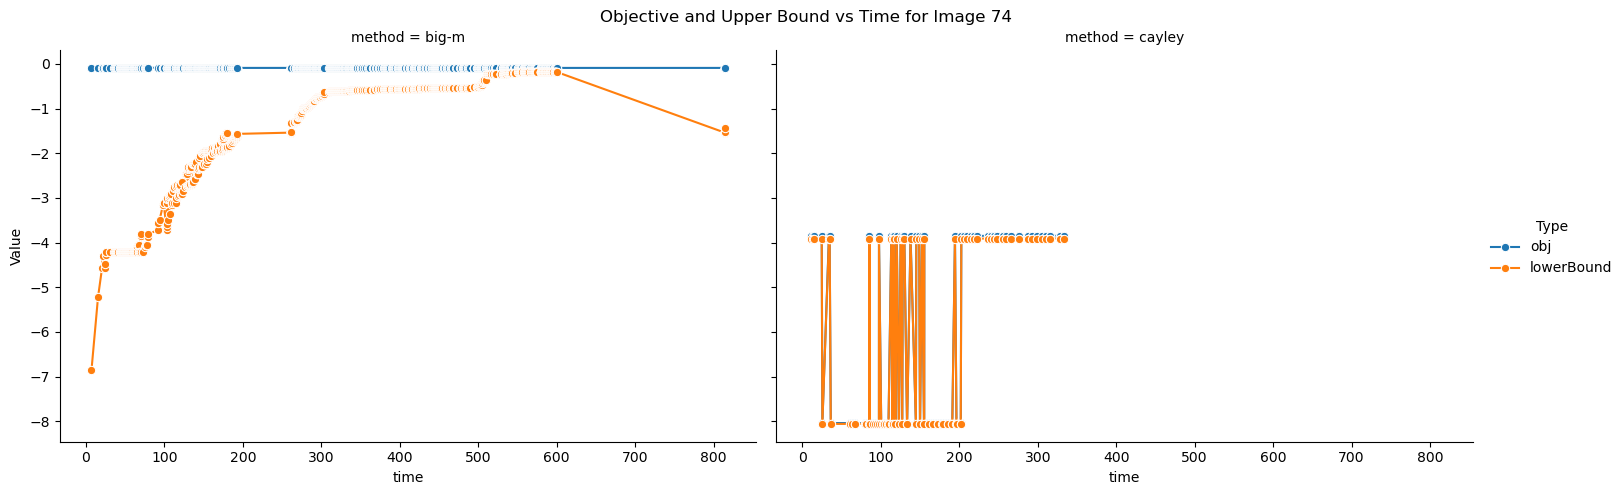

<Figure size 1200x600 with 0 Axes>

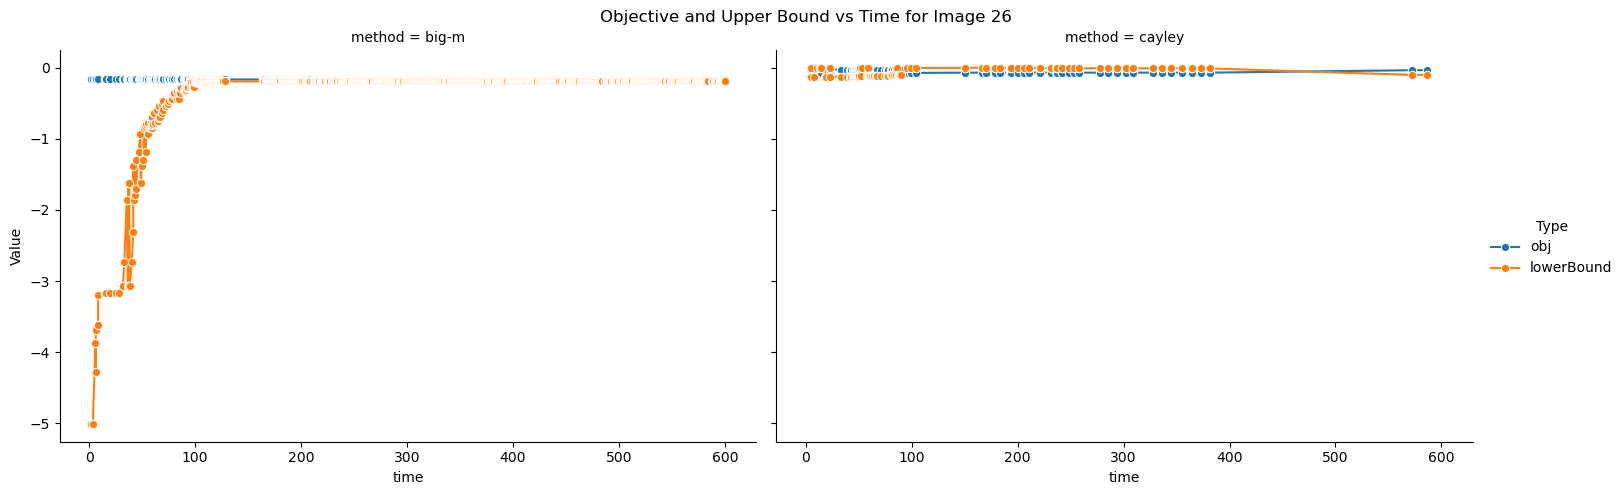

<Figure size 1200x600 with 0 Axes>

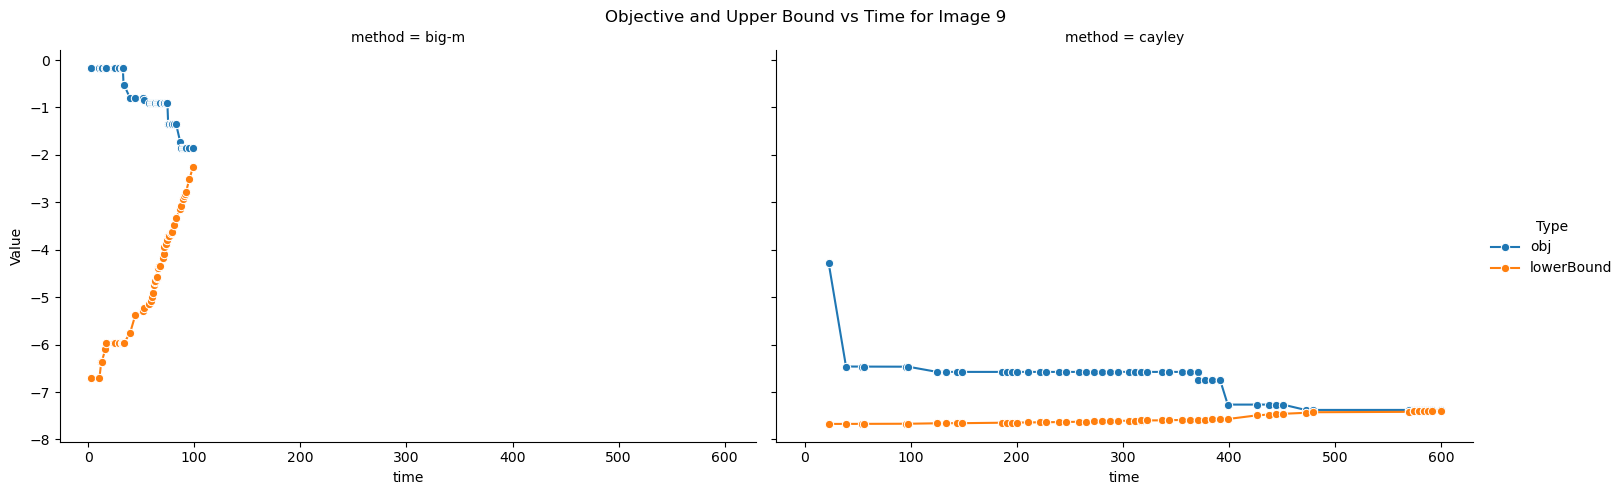

In [24]:


grouped_df = df.groupby(by = ['img', 'method'])

# Now let's generate the same visualization for each unique image
unique_images = df['img'].unique()

for image in unique_images:
    plt.figure(figsize=(12, 6))
    image_data = df[df['img'] == image]
    melted_image_data = pd.melt(image_data, id_vars=['time', 'method'], value_vars=['obj', 'lowerBound'], 
                                var_name='Type', value_name='Value')
    
    g = sns.FacetGrid(melted_image_data, col="method", hue="Type", height=5, aspect=1.5)
    g.map(sns.lineplot, "time", "Value", marker="o")
    g.add_legend()
    
    plt.subplots_adjust(top=0.9)
    g.figure.suptitle(f'Objective and Upper Bound vs Time for Image {image}')
    plt.show()

        obj  lowerBound   time  img method
0 -7.696384    6.897906  0.710    9  big-m
1 -7.696384    6.371812  0.787    9  big-m
2 -7.696384    6.097412  0.818    9  big-m
3 -7.696384    5.933787  1.207    9  big-m
4 -7.696384    5.904766  1.251    9  big-m
tagging elements
        obj  lowerBound   time  img method  nn_id
0 -7.696384    6.897906  0.710    9  big-m      0
1 -7.696384    6.371812  0.787    9  big-m      0
2 -7.696384    6.097412  0.818    9  big-m      0
3 -7.696384    5.933787  1.207    9  big-m      0
4 -7.696384    5.904766  1.251    9  big-m      0
            obj  lowerBound     time  img  method  nn_id
54572 -1.037411     0.21057  600.096    9  cayley      1
54573 -1.037411     0.21057  600.096    9  cayley      1
54574 -1.037411     0.21057  600.096    9  cayley      1
54575 -1.037411     0.21057  600.096    9  cayley      1
54576 -1.037411     0.21057  600.096    9  cayley      1
showing nn with ids  0 1
found all img data with correct IDs
images melted
plot cre

<Figure size 1200x600 with 0 Axes>

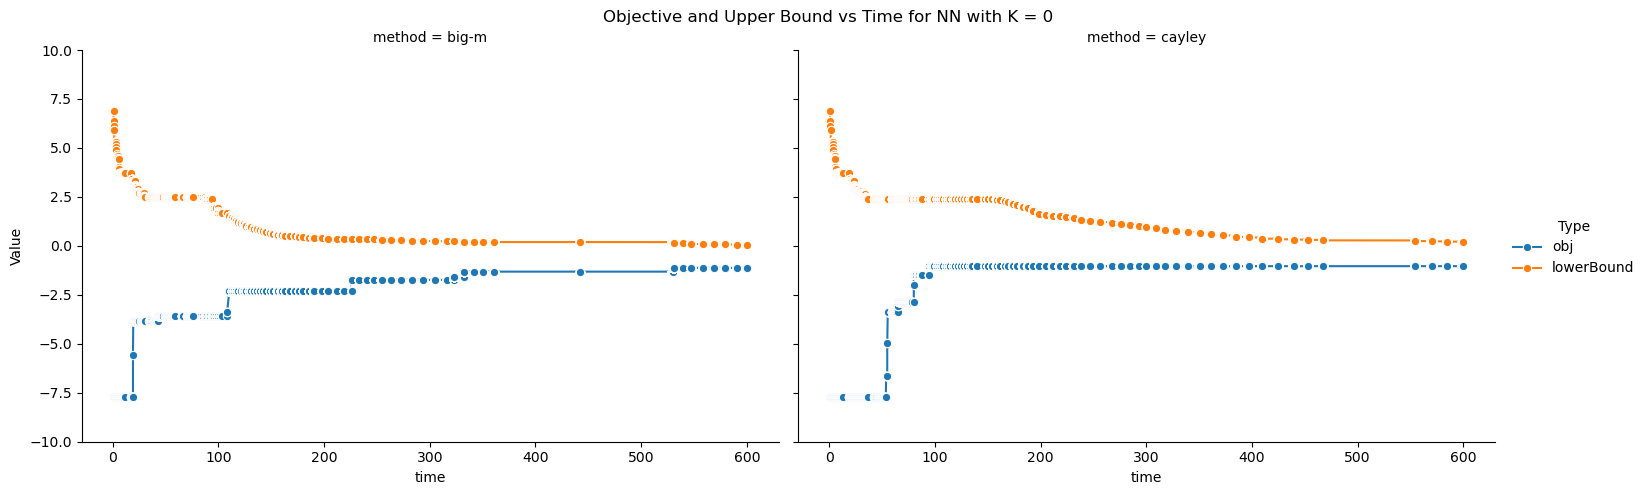

In [8]:
# Add a column with an ID based on the alternation of methods
nn_id = 0
prev_method = None
print(df.head())
print("tagging elements")
for i, row in df.iterrows():
    if row['method'] != prev_method:
        if prev_method is not None:
            nn_id += 1
        prev_method = row['method']
    df.at[i, 'nn_id'] = nn_id

# Convert the 'nn_id' column to integer type
df['nn_id'] = df['nn_id'].astype(int)

print(df.head())
print(df.tail())

grouped_df = df.groupby(by = ['nn_id', 'method'])
# Now let's generate the same visualization for each unique nn
unique_nns = df['nn_id'].unique()
plots = []
for i in range(0, max(unique_nns) + 1, 2):
    print("showing nn with ids ", i, i + 1)
    plt.figure(figsize=(12, 6))
    image_data = df[df['nn_id'].isin([i, i + 1])]
    # print(image_data.head())
    # print(image_data.tail())
    print("found all img data with correct IDs")
    melted_image_data = pd.melt(image_data, id_vars=['time', 'method'], value_vars=['obj', 'lowerBound'], 
                                var_name='Type', value_name='Value')
    print("images melted")
    g = sns.FacetGrid(melted_image_data, col="method", hue="Type", height=5, aspect=1.5)
    g.map(sns.lineplot, "time", "Value", marker="o")
    g.add_legend()
    print("plot created")
    for ax in g.axes.flat:
        ax.set_ylim(-10, 10)    # Set the y-axis limits

    plt.subplots_adjust(top=0.9)
    g.figure.suptitle(f'Objective and Upper Bound vs Time for NN with K = {i}')
    plots.append(g)
    plt.show()